In [90]:
pip install pygraphviz

  Using cached pygraphviz-1.11.zip (120 kB)
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
    Running setup.py install for pygraphviz: started
    Running setup.py install for pygraphviz: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\dell\\AppData\\Local\\Temp\\pip-install-8xqcfyb6\\pygraphviz\\setup.py'"'"'; __file__='"'"'C:\\Users\\dell\\AppData\\Local\\Temp\\pip-install-8xqcfyb6\\pygraphviz\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\dell\AppData\Local\Temp\pip-wheel-c0jnr_th'
       cwd: C:\Users\dell\AppData\Local\Temp\pip-install-8xqcfyb6\pygraphviz\
  Complete output (47 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-3.8\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-3.8\pygraphviz
  copying pygraphvi

In [85]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [37]:

# Function to read edges from the file
def read_edges(file_path):
    edges_list = []
    with open(file_path, 'r') as file:
        for line in file:
            # Splitting each line and extracting relevant information
            u, v, weight, timestamp = map(float, line.strip().split())
            edges_list.append((int(u), int(v), {'weight': weight, 'timestamp': int(timestamp)}))
    return edges_list

In [41]:
# Function to visualize the dynamic network
def visualize_dynamic_network(edges_list, timestamp):
    # Create a directed graph
    G = nx.Graph()

    # Add edges with weights and timestamps
    for u, v, data in edges_list:
        if data['timestamp'] == timestamp:
            G.add_edge(u, v, weight=data['weight'])

    # Extract edge weights for visualization
    edge_weights = [data['weight'] for u, v, data in G.edges(data=True)]

    # Normalize edge weights to be in the range [0, 1]
    normalized_weights = np.array(edge_weights) / max(edge_weights)

    # Draw the graph with edge colors based on weights
    pos = nx.spring_layout(G)  # You can use other layout algorithms
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=250, edge_color=normalized_weights, cmap=plt.cm.viridis, font_size=8)

    # Add a color bar for edge weights
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
    sm._A = []
    plt.colorbar(sm, label='Edge Weight (Normalized)')

    # Set plot title and display
    plt.title(f'Dynamic Network at Timestamp {timestamp}')
    plt.show()



In [42]:
# Replace 'your_file.edges' with the actual file path
file_path = 'D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Data/Aves sparrow/aves-sparrow-social.edges'
edges_list = read_edges(file_path)
set([edg[2]['timestamp'] for edg in edges_list])

{2009, 2010}

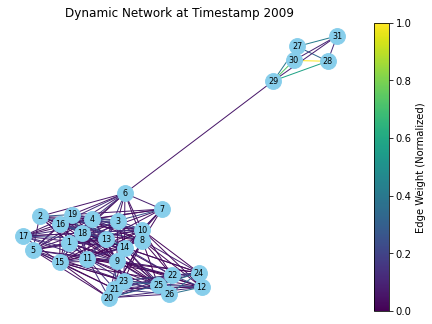

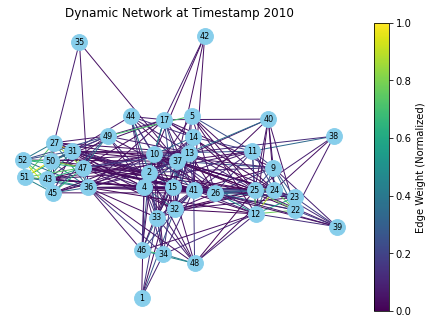

In [43]:
# Visualize the network at different timestamps
timestamps_to_visualize = [2009,2010]  # Add timestamps as needed
for timestamp in timestamps_to_visualize:
    visualize_dynamic_network(edges_list, timestamp)


In [91]:
# Function to read edges from the file
def read_edges_unweighted(file_path):
    edges_list = []
    with open(file_path, 'r') as file:
        for line in file:
            # Splitting each line and extracting relevant information
            u, v, timestamp = map(float, line.strip().split())
            edges_list.append((int(u), int(v), {'timestamp': int(timestamp)}))
    return edges_list

In [105]:
# Function to visualize the dynamic network
def visualize_dynamic_network_unweighted(edges_list, timestamp):
    G = nx.Graph()

    # Add edges with weights and timestamps
    for u, v, data in edges_list:
        if data['timestamp'] == timestamp:
            G.add_edge(u, v)

    # Draw the graph with edge colors based on weights
    pos = nx.kamada_kawai_layout(G)  # You can use other layout algorithms
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, font_color='black', cmap=plt.cm.viridis, alpha=0.65, arrowsize=10)

    # Set plot title and display
    plt.title(f'Dynamic Network at Timestamp {timestamp}')
    plt.show()



In [106]:
file_path = 'D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Data/Reptilia Tortoise network/reptilia-tortoise-network-bsv.edges'
edges_list = read_edges_unweighted(file_path)
set([edg[2]['timestamp'] for edg in edges_list])

{1996, 1997, 1998, 1999}

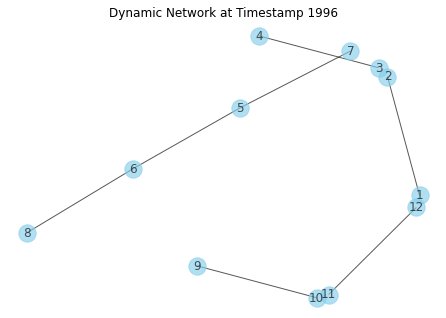

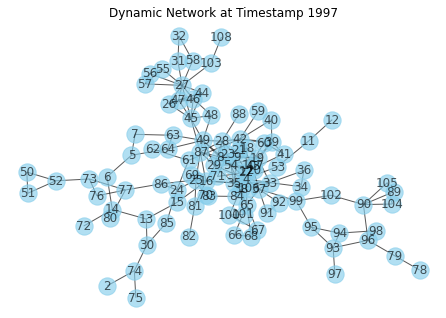

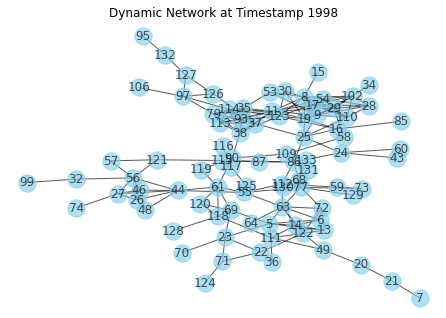

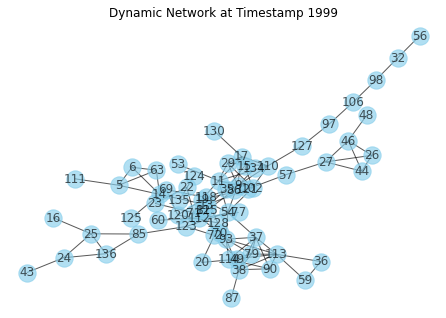

In [107]:
timestamps_to_visualize = [1996,1997,1998,1999]  # Add timestamps as needed
for timestamp in timestamps_to_visualize:
    visualize_dynamic_network_unweighted(edges_list, timestamp)